In [11]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette("pastel")


# Global Plastics Production

In [15]:
gp = pd.read_csv('./1- global-plastics-production.csv')
gp.columns = ['Entity', 'Code', 'Year', 'TotalProduction']

gp.TotalProduction = gp.TotalProduction / 1_000_000
gp.head()

,Entity,Code,Year,TotalProduction
0,World,OWID_WRL,1950,2.0
1,World,OWID_WRL,1951,2.0
2,World,OWID_WRL,1952,2.0
3,World,OWID_WRL,1953,3.0
4,World,OWID_WRL,1954,3.0


In [16]:
gp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Entity           69 non-null     object 
 1   Code             69 non-null     object 
 2   Year             69 non-null     int64  
 3   TotalProduction  69 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.3+ KB


In [17]:
gp.describe()

,Year,TotalProduction
count,69.000000,69.000000
mean,1984.652174,137.563821
std,20.460023,132.041805
min,1950.000000,2.000000
25%,1967.000000,23.000000
50%,1985.000000,90.000000
75%,2002.000000,231.000000
max,2019.000000,459.746020


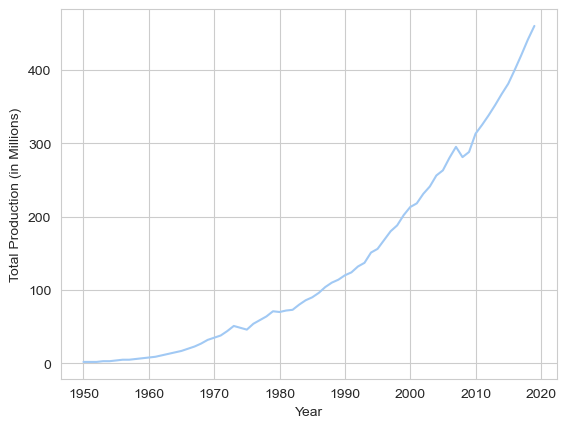

In [20]:
plt.figure()
sns.lineplot(data = gp, x = 'Year', y = 'TotalProduction')

plt.ylabel('Total Production (in Millions)')
plt.show()

# Share of Global Plastic Waste Emittede to the Ocean

In [35]:
df = pd.read_csv('./2- share-of-global-plastic-waste-emitted-to-the-ocean.csv')

df.columns = ['Entity', 'Code', 'Year', 'ShareOfPlasticEmittedToOcean']

df.head()

,Entity,Code,Year,ShareOfPlasticEmittedToOcean
0,Africa,NaN,2019,7.989317
1,Albania,ALB,2019,0.159782
2,Algeria,DZA,2019,0.589510
3,Angola,AGO,2019,0.087804
4,Antigua and Barbuda,ATG,2019,0.000204


In [38]:
df.sort_values(by = 'ShareOfPlasticEmittedToOcean', ascending = False).head(10)

,Entity,Code,Year,ShareOfPlasticEmittedToOcean
6,Asia,NaN,2019,80.993570
119,Philippines,PHL,2019,36.384511
67,India,IND,2019,12.916633
0,Africa,NaN,2019,7.989317
89,Malaysia,MYS,2019,7.463107
25,China,CHN,2019,7.218993
68,Indonesia,IDN,2019,5.751446
144,South America,NaN,2019,5.513253
108,North America,NaN,2019,4.499121
16,Brazil,BRA,2019,3.859175


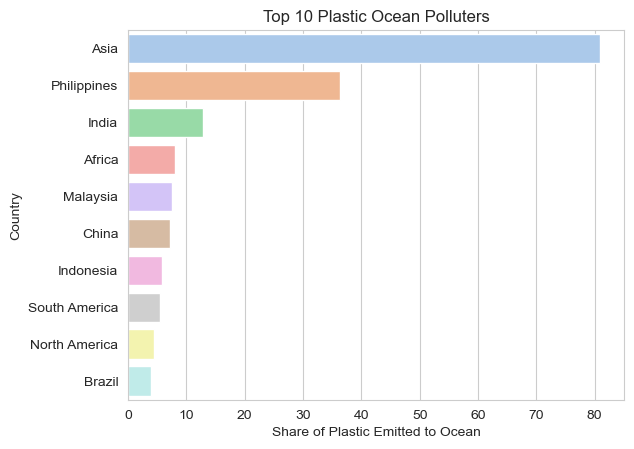

In [45]:
plt.figure()

top_10 = df.sort_values(by = 'ShareOfPlasticEmittedToOcean', ascending = False).head(10)

sns.barplot(data = top_10, y = 'Entity', x = 'ShareOfPlasticEmittedToOcean')

plt.title('Top 10 Plastic Ocean Polluters')
plt.ylabel('Country')
plt.xlabel('Share of Plastic Emitted to Ocean')
plt.show()

# Share Plastic Fate

In [77]:
df = pd.read_csv('./3- share-plastic-fate.csv')

df.columns = ['Country', 'Code', 'Year', 'ShareOfWasteRecycledFromTotalRegionalWaste', 
              'ShareOfWasteIncineratedFromTotalRegionWaste', 'ShareOfLitteredAndMismangedFromTotalRegionalWaste',
              'ShareOfWasteLandfilledFromTotalRegionalWaste']

df.head()

,Country,Code,Year,ShareOfWasteRecycledFromTotalRegionalWaste,ShareOfWasteIncineratedFromTotalRegionWaste,ShareOfLitteredAndMismangedFromTotalRegionalWaste,ShareOfWasteLandfilledFromTotalRegionalWaste
0,Americas (excl. USA),NaN,2000,4.721963,1.220057,32.702644,61.355328
1,Americas (excl. USA),NaN,2001,4.972505,1.208672,32.651270,61.167557
2,Americas (excl. USA),NaN,2002,5.227469,1.197566,32.610554,60.964405
3,Americas (excl. USA),NaN,2003,5.482511,1.186352,32.546440,60.784700
4,Americas (excl. USA),NaN,2004,5.740007,1.175283,32.480970,60.603745


In [79]:
df.Country.value_counts()

Americas (excl. USA)            20
Asia (excl. China and India)    20
China                           20
Europe                          20
India                           20
Middle East & North Africa      20
Oceania                         20
Sub-Saharan Africa              20
United States                   20
World                           20
Name: Country, dtype: int64

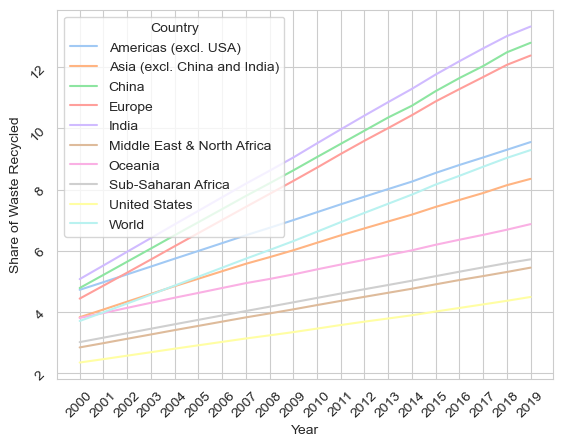

In [82]:
plt.figure()

ax = sns.lineplot(data = df, x = 'Year', y = 'ShareOfWasteRecycledFromTotalRegionalWaste', hue = 'Country')


ax.set_ylabel('Share of Waste Recycled')
ax.set_xticks(np.arange(2000, 2020, 1))
ax.tick_params(labelrotation = 45)